# Actividad 1

1. Sea T el contenido del archivo 'pi-1m.txt', éste contiene el primer millón de dígitos de π (tomado de https://newton.ex.ac.uk/research/qsystems/collabs/pi/). También puede usar los archivos de datos que hemos usado pero debería adaptar y explicar la adaptación en el reporte.

   * Considere que Σ = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}.
   * Sea A ⊆ $Σ^4$, $|A| = 1000$ seleccione de manera aleatoria A.
   * Sea B ⊆ $Σ^8$, $|A| = 1000$ seleccione de manera aleatoria B.
   * Sea C ⊆ $Σ^{16}$, $|A| = 1000$ seleccione de manera aleatoria C.
   * Sea D ⊆ $Σ^{32}$, $|A| = 1000$ seleccione de manera aleatoria D.
   * Sea E ⊆ $Σ^{64}$, $|A| = 1000$ seleccione de manera aleatoria E.

2. Implemente el algoritmo Shift-And o use el que se proporciona antes.

3. Implemente el algoritmo naïve que consiste en verificar ventana a ventana por emparejamiento sin usar operaciones a nivel de bits y avanzando uno en uno los caracteres.

4. Realice y reporte los siguientes experimentos:
   * Para cada p ∈ A busque p en T y reporte de manera acumulada el tiempo en segundos, compare Shift-And y el algoritmo naïve usando figuras 'boxplot'.
   * Para cada p ∈ B busque p en T y reporte de manera acumulada el tiempo en segundos, compare Shift-And y el algoritmo naïve usando figuras 'boxplot'.
   * Para cada p ∈ C busque p en T y reporte de manera acumulada el tiempo en segundos, compare Shift-And y el algoritmo naïve usando figuras 'boxplot'.
   * Para cada p ∈ D busque p en T y reporte de manera acumulada el tiempo en segundos, compare Shift-And y el algoritmo naïve usando figuras 'boxplot'.
   * Para cada p ∈ E busque p en T y reporte de manera acumulada el tiempo en segundos, compare Shift-And y el algoritmo naïve usando figuras 'boxplot'.

In [13]:
def pattern(pat):
    D = {}
    for i, c in enumerate(pat):
        d = D.get(c, 0)
        d |= 1 << i
        D[c] = d
    return D

def search(text, pat, L=None):
    if L is None:
        L = []
    D = pattern(pat)
    S = 0
    plen = len(pat)
    m = 1 << (plen - 1)
    for i, c in enumerate(text):
        d = D.get(c, 0)
        S = ((S << 1) | 1) & d
        if S & m > 0:
            L.append(i - plen + 1)
    return L

In [14]:
search('abracadabra', 'abr')

[0, 7]

In [15]:
search('mississippi', 'ss')

[2, 5]

In [16]:
search('mississippi', 'i')

[1, 4, 7, 10]

In [17]:
def naive_search(text, pat):
    L = []
    n = len(text)
    m = len(pat)
    for i in range(n - m + 1):
        if text[i:i + m] == pat:
            L.append(i)
    return L

In [18]:
naive_search('abracadabra', 'abr')

[0, 7]

In [19]:
naive_search('mississippi', 'ss')

[2, 5]

In [20]:
naive_search('mississippi', 'i')

[1, 4, 7, 10]

/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_22299/81641479.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot([times_shift_and[key], times_naive[key]], labels=['Shift-And', 'Naïve'])
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_22299/81641479.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot([times_shift_and[key], times_naive[key]], labels=['Shift-And', 'Naïve'])
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_22299/81641479.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot([times_shift_and[key], times_naive[key]], labels=['Sh

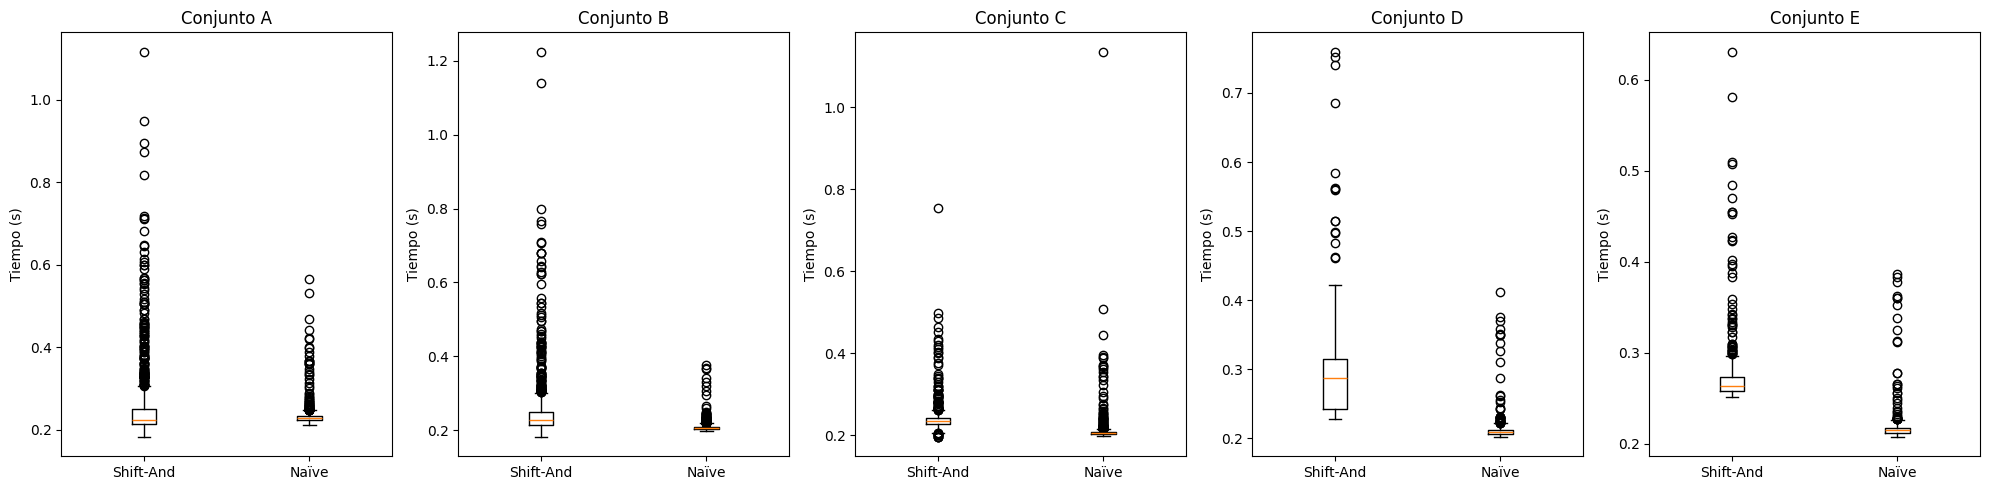

In [24]:
import random
import time
import matplotlib.pyplot as plt

# Leer el contenido del archivo 'pi-1m.txt'
with open('pi1-m.txt', 'r') as file:
    T = file.read().strip()

# Generar conjuntos A, B, C, D, E
def generate_random_patterns(num_patterns, pattern_length):
    patterns = []
    for _ in range(num_patterns):
        pattern = ''.join(random.choices('0123456789', k=pattern_length))
        patterns.append(pattern)
    return patterns

A = generate_random_patterns(1000, 4)
B = generate_random_patterns(1000, 8)
C = generate_random_patterns(1000, 16)
D = generate_random_patterns(1000, 32)
E = generate_random_patterns(1000, 64)

# Medir tiempos y generar boxplots
def measure_time_and_plot(patterns, algorithm):
    times = []
    for pat in patterns:
        start_time = time.time()
        algorithm(T, pat)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# Medir tiempos para cada conjunto y algoritmo
times_shift_and = {
    'A': measure_time_and_plot(A, search),
    'B': measure_time_and_plot(B, search),
    'C': measure_time_and_plot(C, search),
    'D': measure_time_and_plot(D, search),
    'E': measure_time_and_plot(E, search)
}

times_naive = {
    'A': measure_time_and_plot(A, naive_search),
    'B': measure_time_and_plot(B, naive_search),
    'C': measure_time_and_plot(C, naive_search),
    'D': measure_time_and_plot(D, naive_search),
    'E': measure_time_and_plot(E, naive_search)
}

# Generar boxplots
def plot_boxplots(times_shift_and, times_naive):
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    for i, key in enumerate(times_shift_and.keys()):
        axs[i].boxplot([times_shift_and[key], times_naive[key]], tick_labels=['Shift-And', 'Naïve'])
        axs[i].set_title(f'Conjunto {key}')
        axs[i].set_ylabel('Tiempo (s)')
    plt.tight_layout()
    plt.show()

plot_boxplots(times_shift_and, times_naive)